# We make a grid of parameters we want to test, this is our original, adjust values based on results
param_grid = {

    'criterion': np.array(['gini', 'entropy']),
    'max_depth': np.arange(1, 11, 1),
    'splitter': np.array(['best', 'random']),
    'min_samples_split': np.array([2, 5, 10]),
    'min_samples_leaf': np.arange(1,10,2),
    'min_weight_fraction_leaf': np.arange(0.0, 0.5, 0.1),
    'max_features': np.array(['sqrt', 'log2']),
    'max_leaf_nodes': np.arange(2, 11, 2),
    'min_impurity_decrease': np.array([0.0, 0.1, 0.2]),
    'ccp_alpha': np.arange(0.0, 0.5, 0.1)
}

# 1. Imports, load the data and get our first pair up. Could be done in loop for all parameters but for the sake of graphs, editing and readability keep it separate for each pair, at least for now

In [17]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv


data =  pd.read_csv('parkinson.csv')
X_dt = data.drop('target', axis=1)
y_t = data['target']
param_grid = {
    'criterion': np.array(['gini', 'entropy']),
    'max_depth': np.arange(1, 11, 1)
}

# 2. Get our DT classifier up, random_state= always the same to replicate each pair without problems. Use GridSearchCV for cross-validation and get the results

In [12]:
clf = DecisionTreeClassifier(random_state=0)

In [18]:
grid_search = GridSearchCV(clf, param_grid, cv=10) #cv = number of folds for our set, can get higher here for better results, cause computation time ain't an issue for DT
grid_search.fit(X_dt, y_t)

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

In [19]:
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [20]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Optimal Parameters:
criterion: entropy
max_depth: 4


In [21]:
results_df.head(len(results_df)) #showing the results, prolly no issue with omitting this one, show for first and last 

,criterion,max_depth,accuracy
0,gini,1,0.828158
1,gini,2,0.783421
2,gini,3,0.808158
3,gini,4,0.793158
4,gini,5,0.798421
5,gini,6,0.793158
6,gini,7,0.793158
7,gini,8,0.798421
8,gini,9,0.798421
9,gini,10,0.798421


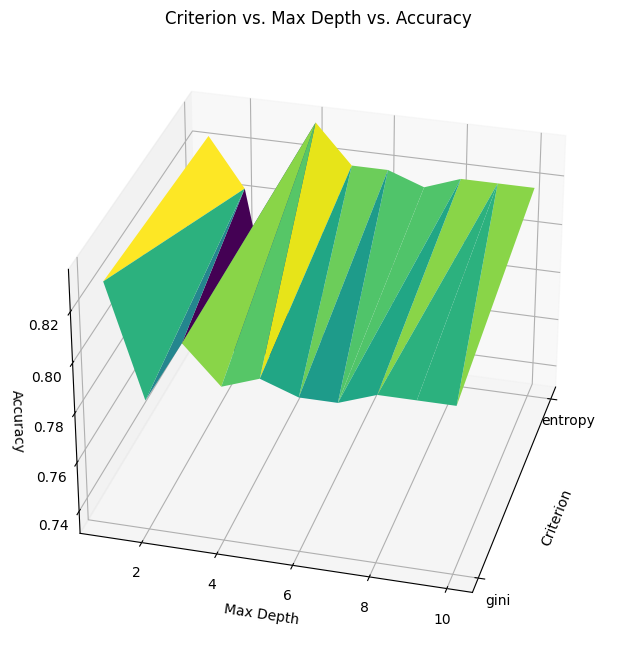

In [26]:
# only used for jupyter notebooks, whether the graph pops out in new window(auto or similar) 
# to be inspected or generates below with specified or defult position
%matplotlib inline

# do the same as in other cv notebook and do additional block with just filtered_df and converting to categorical so it doesn't
# have to run each time, non issue for now

# make a copy of our results for each pair we want to plot so we can set them up for plotting
filtered_df = results_df.loc[:, ['accuracy', 'max_depth', 'criterion']].copy()

# convert each parameter that ain't int to categorical type
filtered_df['criterion'] = pd.Categorical(filtered_df['criterion'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['criterion'].cat.codes
y = filtered_df['max_depth'].values
z = filtered_df['accuracy'].values

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none') 

ax.set_xticks(np.unique(x))
ax.set_xticklabels(filtered_df['criterion'].cat.categories)

# dont forget to change the names for each pair 
ax.set_xlabel('Criterion')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Accuracy')
ax.set_title('Criterion vs. Max Depth vs. Accuracy')
# ax.view_init() can be used to rotate the graph for better view
ax.view_init(azim=15)
plt.show()

# Next pair
Using the same code below with added next pair and first one being just results from previous iteration, manually

In [27]:
param_grid = {
    'criterion': np.array(['entropy']),
    'max_depth': np.array([4]),
    'splitter': np.array(['best', 'random']),
    'min_samples_split': np.array([2, 4, 6, 8, 10])
}
clf = DecisionTreeClassifier(random_state=0)

In [28]:
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_dt, y_t)

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [29]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Optimal Parameters:
criterion: entropy
max_depth: 4
min_samples_split: 2
splitter: best


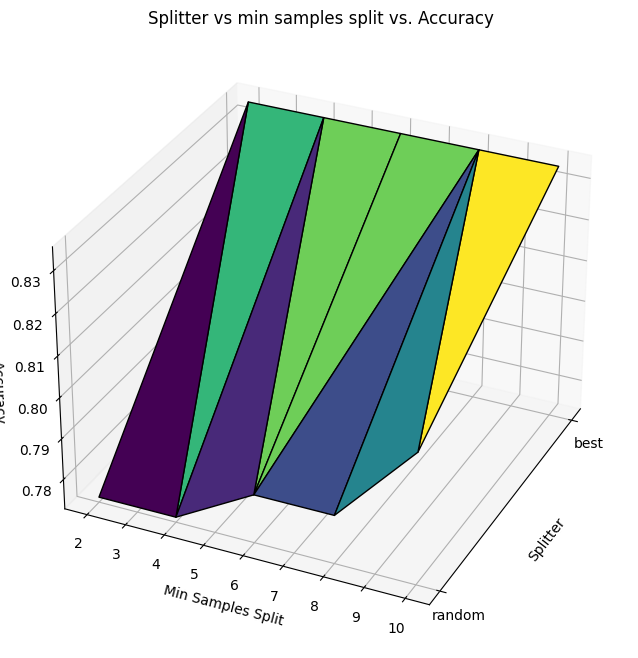

In [33]:
%matplotlib inline

filtered_df = results_df.loc[:, ['accuracy', 'splitter', 'min_samples_split']].copy()

filtered_df['splitter'] = pd.Categorical(filtered_df['splitter'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['splitter'].cat.codes
y = filtered_df['min_samples_split'].values
z = filtered_df['accuracy'].values

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black')

ax.set_xticks(np.unique(x))
ax.set_xticklabels(filtered_df['splitter'].cat.categories)

ax.set_xlabel('Splitter')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Accuracy')
ax.set_title('Splitter vs min samples split vs. Accuracy')

ax.view_init(azim=25)

plt.show()

In [34]:
results_df.head(len(results_df))

,criterion,max_depth,min_samples_split,splitter,accuracy
0,entropy,4,2,best,0.834211
1,entropy,4,2,random,0.773947
2,entropy,4,4,best,0.834211
3,entropy,4,4,random,0.773947
4,entropy,4,6,best,0.834211
5,entropy,4,6,random,0.784474
6,entropy,4,8,best,0.834211
7,entropy,4,8,random,0.784474
8,entropy,4,10,best,0.834211
9,entropy,4,10,random,0.804474


# Next

In [48]:
param_grid = {
    'criterion': np.array(['entropy']),
    'max_depth': np.array([4]),
    'splitter': np.array(['best']),
    'min_samples_split': np.array([2]),
    'min_samples_leaf': np.arange(1,10,2),
    'min_weight_fraction_leaf': np.arange(0.0, 0.5, 0.1)
}
clf = DecisionTreeClassifier(random_state=0)

In [49]:
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_dt, y_t)

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [50]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Optimal Parameters:
criterion: entropy
max_depth: 4
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.2
splitter: best


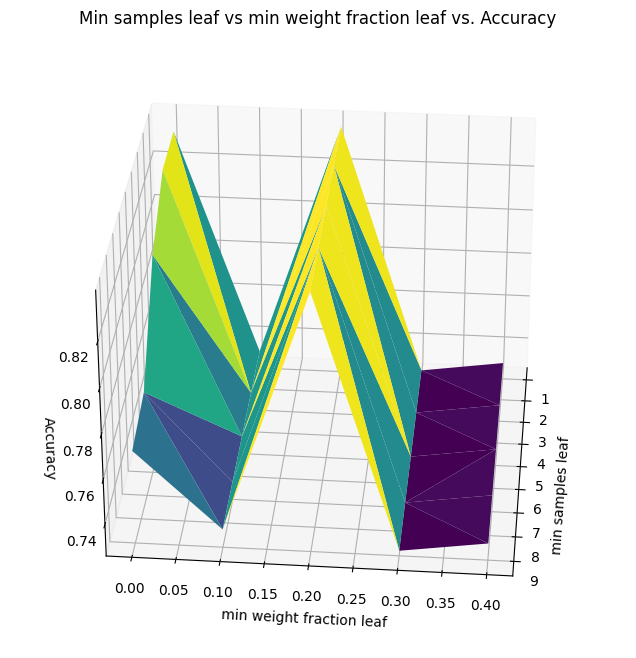

In [55]:
filtered_df = results_df.loc[:, ['accuracy', 'min_samples_leaf', 'min_weight_fraction_leaf']].copy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['min_samples_leaf'].values
y = filtered_df['min_weight_fraction_leaf'].values
z = filtered_df['accuracy'].values

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('min samples leaf')
ax.set_ylabel('min weight fraction leaf')
ax.set_zlabel('Accuracy')
ax.set_title('Min samples leaf vs min weight fraction leaf vs. Accuracy')

ax.view_init(azim=5)

plt.show()

In [40]:
results_df.head(len(results_df))

,criterion,max_depth,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
0,gini,3,1,2,0.0,best,0.808158
1,gini,3,1,2,0.1,best,0.773158
2,gini,3,1,2,0.2,best,0.838684
3,gini,3,1,2,0.3,best,0.808684
4,gini,3,1,2,0.4,best,0.712105
5,gini,3,3,2,0.0,best,0.797895
6,gini,3,3,2,0.1,best,0.773158
7,gini,3,3,2,0.2,best,0.838684
8,gini,3,3,2,0.3,best,0.808684
9,gini,3,3,2,0.4,best,0.712105


# Next

In [56]:
param_grid = {
    'criterion': np.array(['entropy']),
    'max_depth': np.array([4]),
    'splitter': np.array(['best']),
    'min_samples_split': np.array([2]),
    'min_samples_leaf': np.array([1]),
    'min_weight_fraction_leaf': np.array([0.2]),
    'max_features': np.array(['sqrt', 'log2']),
    'max_leaf_nodes': np.arange(2, 11, 2)
}
clf = DecisionTreeClassifier(random_state=0)

In [57]:
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_dt, y_t)

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [58]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Optimal Parameters:
criterion: entropy
max_depth: 4
max_features: sqrt
max_leaf_nodes: 4
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.2
splitter: best


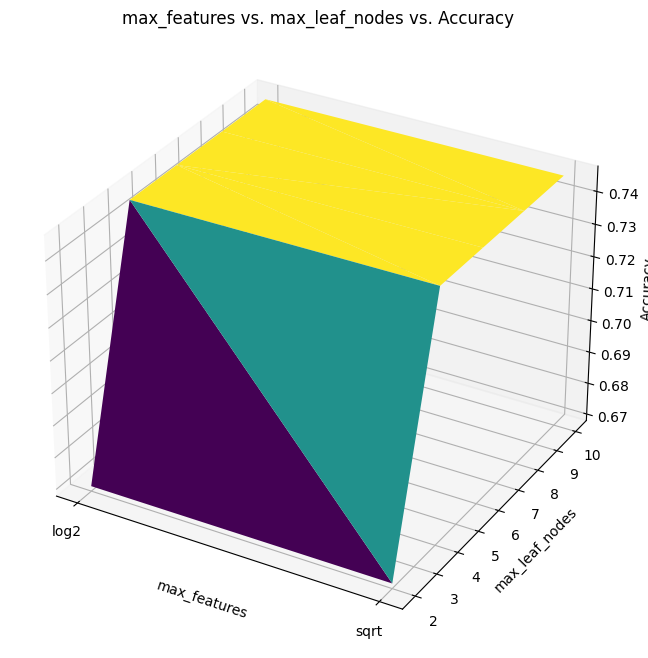

In [60]:
filtered_df = results_df.loc[:, ['accuracy', 'max_features', 'max_leaf_nodes']].copy()

filtered_df['max_features'] = pd.Categorical(filtered_df['max_features'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['max_features'].cat.codes
y = filtered_df['max_leaf_nodes'].values
z = filtered_df['accuracy'].values

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xticks(np.unique(x))
ax.set_xticklabels(filtered_df['max_features'].cat.categories)

ax.set_xlabel('max_features')
ax.set_ylabel('max_leaf_nodes')
ax.set_zlabel('Accuracy')
ax.set_title('max_features vs. max_leaf_nodes vs. Accuracy')

plt.show()

In [61]:
results_df.head(len(results_df))

,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
0,entropy,4,sqrt,2,1,2,0.2,best,0.669474
1,entropy,4,sqrt,4,1,2,0.2,best,0.746053
2,entropy,4,sqrt,6,1,2,0.2,best,0.746053
3,entropy,4,sqrt,8,1,2,0.2,best,0.746053
4,entropy,4,sqrt,10,1,2,0.2,best,0.746053
5,entropy,4,log2,2,1,2,0.2,best,0.669474
6,entropy,4,log2,4,1,2,0.2,best,0.746053
7,entropy,4,log2,6,1,2,0.2,best,0.746053
8,entropy,4,log2,8,1,2,0.2,best,0.746053
9,entropy,4,log2,10,1,2,0.2,best,0.746053


# Next

In [69]:
param_grid = {
    'criterion': np.array(['entropy']),
    'max_depth': np.array([4]),
    'splitter': np.array(['best']),
    'min_samples_split': np.array([2]),
    'min_samples_leaf': np.array([1]),
    'min_weight_fraction_leaf': np.array([0.2]),
    'max_features': np.array(['sqrt']),
    'max_leaf_nodes': np.array([4]),
    'min_impurity_decrease': np.array([0.0, 0.1, 0.2 ,0.3]),
    'ccp_alpha': np.arange(0.0, 0.5, 0.1)   
}
clf = DecisionTreeClassifier(random_state=0)

In [70]:
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_dt, y_t)

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [71]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Optimal Parameters:
ccp_alpha: 0.0
criterion: entropy
max_depth: 4
max_features: sqrt
max_leaf_nodes: 4
min_impurity_decrease: 0.2
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.2
splitter: best


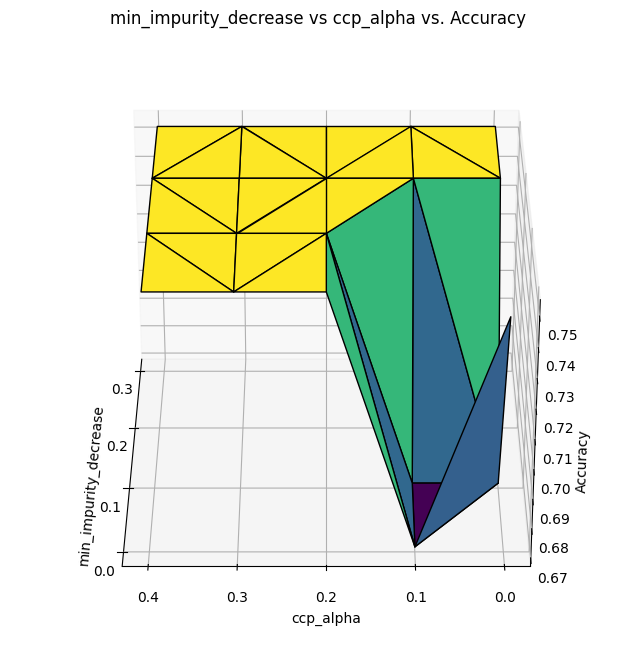

In [74]:
filtered_df = results_df.loc[:, ['accuracy', 'min_impurity_decrease', 'ccp_alpha']].copy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['min_impurity_decrease'].values
y = filtered_df['ccp_alpha'].values
z = filtered_df['accuracy'].values

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black')

ax.set_xticks(np.unique(x))
ax.set_yticks(np.unique(y))

ax.set_xlabel('min_impurity_decrease')
ax.set_ylabel('ccp_alpha')
ax.set_zlabel('Accuracy')
ax.set_title('min_impurity_decrease vs ccp_alpha vs. Accuracy')

ax.view_init(azim=-180)

plt.show()

In [75]:
results_df.head(len(results_df))

,ccp_alpha,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
0,0.0,entropy,4,sqrt,4,0.0,1,2,0.2,best,0.746053
1,0.0,entropy,4,sqrt,4,0.1,1,2,0.2,best,0.669474
2,0.0,entropy,4,sqrt,4,0.2,1,2,0.2,best,0.753947
3,0.0,entropy,4,sqrt,4,0.3,1,2,0.2,best,0.753947
4,0.1,entropy,4,sqrt,4,0.0,1,2,0.2,best,0.669474
5,0.1,entropy,4,sqrt,4,0.1,1,2,0.2,best,0.669474
6,0.1,entropy,4,sqrt,4,0.2,1,2,0.2,best,0.753947
7,0.1,entropy,4,sqrt,4,0.3,1,2,0.2,best,0.753947
8,0.2,entropy,4,sqrt,4,0.0,1,2,0.2,best,0.753947
9,0.2,entropy,4,sqrt,4,0.1,1,2,0.2,best,0.753947


# Optimal parameters from Iris dataset:

ccp_alpha: 0.0 
criterion: gini
max_depth: 3
max_features: sqrt
max_leaf_nodes: 6
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
splitter: random

# Optimal parameters from Parkinsons dataset:
ccp_alpha: 0.0
criterion: entropy
max_depth: 4
max_features: sqrt
max_leaf_nodes: 4
min_impurity_decrease: 0.2
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.2
splitter: best